In [2]:
from montecarlo import *
from mcintegration import *

%matplotlib inline
import numpy as np
import math
from math import pi
from math import e
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy import linalg as LA

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

In [7]:
def s1(x,y):
    return x**2 + y**2
def s1_flip(x,y):
    return abs(x*y)
alpha = 2
def f(x):
    return x**2
def g(x):
    return e**(2*abs(x))
def h(x):
    return np.e**abs(x)
def normal(x, mu=0, sigma=1):
    return 1/(sigma*np.sqrt(2*pi))*e**(-.5*(x - mu**2)/sigma)
def k(x, y, z):
    return x*y*z/2
def j(x, y, z):
    return x + y + z
def ran(x,y,z,r=2):
    return (r**2)*np.random.rand()
def sphere(x, y, z, r = 2):
    r0 = x**2+y**2+z**2
    if r0 <= r**2:
        return r0
    return 0
def idf(x, y, z):
    return 1
def r(x,y):
    return e**(math.sin(x*y))
def r_pdf(x,y):
    return 4*x*y

bound_a, bound_b = [-1,-1], [1,1]

theta_a, theta_b = 0, 2*pi
mean = np.arctan(1/alpha)
sd = np.sqrt(1 - alpha/(np.sqrt(1 + alpha**2)))
sa1 = [-1,-1,-1]
sb1 = [1,1,1]
sa2 = [-2,-2,-2]
sb2 = [2,2,2]
r(0, 1)


1.0

In [12]:
integrator = MonteCarloIntegration(f, a = -2, b = 2, n_distsamples = 5000)
value, error, plot = integrator.integrate(g, sample_method = 'AcceptanceRejection', nsamples = 5000, burn_in = 0)
print(value, error)

KeyboardInterrupt: 

4.974082429693027 0.04071699228509338


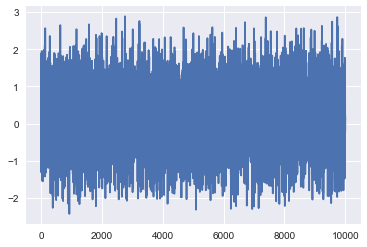

In [113]:
integrator = MonteCarloIntegration(sphere, a = sa1, b = sb1, n_distsamples = 5000, ndim =3)
value, error, plot = integrator.integrate(j, sample_method = 'Metropolis', nsamples = 10000, burn_in = 5000)
print(value, error)

4.504432072464108 0.44133471814683406


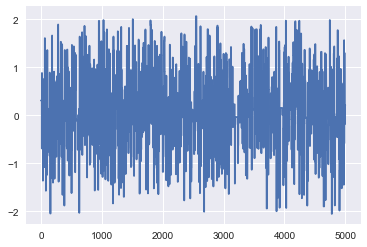

In [10]:
integrator = MonteCarloIntegration(sphere, a = sa2, b = sb2, n_distsamples = 10000, ndim = 3)
value, error, plot = integrator.integrate(j, sample_method = 'MetropolisHastings', nsamples = 5000, 
                                          burn_in = 2000)
print(value, error)

8.0465384955907 0.04132422680661997


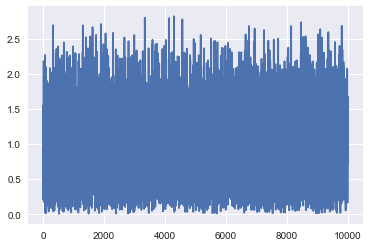

In [69]:
integrator = MonteCarloIntegration(sphere, a = sa1, b = sb1, n_distsamples = 1000, ndim = 3)
value, error, plot = integrator.integrate(s1_flip, sample_method = 'Uniform', nsamples = 10000, 
                                          burn_in = 1000)
print(value, error)

In [ ]:
def Metropolis(proposal, target, mu = 0, sigma = 1, N = 1000, x0 = None):
    if not x0:
        x0 = q.rvs()
    X = [x0]
    while len(X) < N:
        x = X[-1]
        y = q.pdf(x) + q.rvs()
        u = np.random.uniform(0,1)
        try:
            alpha = min(1,p.pdf(y)/p.pdf(x))
        except ZeroDivisionError:
            alpha = 0
        if u <= alpha:
            X.append(y)
        else:
            X.append(x)
    return X

def MetropolisHastings(proposal, target, mean = 0,std = 1, N = 1000, x0 = None):
    if not x0:
            x0 = q.rvs()
    X = [x0]
    while len(X) < N:
        x = X[-1]
        y = q.pdf(x) + q.rvs()
        u = np.random.uniform(0,1)
        try:
            alpha = min(1,(p.pdf(y)*q.pdf(x-y))/(p.pdf(x)*p.pdf(y-x)))
        except ZeroDivisionError:
            alpha = 0
        if u <= alpha:
            X.append(y)
        else:
            X.append(x)
    return X


In [ ]:
def SampleMethod(method, *args, **kwargs):
            return {
            'Naive': 1,
            'AcceptanceRejection':  2,
            'Metropolis':  3,
            'MetropolisHastings': 4
            }.get(method, "Method %s not implemented" % method)

SampleMethod('AcceptanceReject)

In [ ]:
class p_gen(st.rv_continuous):
    "Generate a probability distribution for a given function"
    def _pdf(self, x):
           return f(x)
class q_gen(st.rv_continuous):
    "Generate a probability distribution for a given function"
    def _pdf(self, x):
           return g(x)
class dist():
    def __init__(self, f, a, b, ndim = 1,mu=None, sigma=None, nsamples=1000):
        self.f = f 
        self.mu = mu
        self.sigma = sigma
        self.a = a
        self.b = a
        self.nsamples = nsamples
        self.ndim = ndim
        
    def sampler(self):
        if self.ndim == 1:
            return [self.f(c) for c in np.random.uniform(self.a, self.b,size = self.nsamples)]
        return [self.f(c) for c in np.random.uniform(self.a, self.b,size = (self.nsamples, self.ndim))]
        
         
        
    def pdf(self, s):
        samples = self.sampler()
        if np.sign(s) > -1:
            mu = len([y for y in samples if s >=  y >= 0])
            return mu/self.nsamples
        mu = len([y for y in samples if -s >= -y >= 0])
        return mu/self.nsamples

    def rvs(self, mu, sigma):
        return self.mu + np.random.uniform(-1,1)*self.sigma
    


In [ ]:
bound_a, bound_b = -2, 2
M = 1000
X = np.random.uniform(bound_a, bound_b, size = (M, 2))
samples = [f(x) for x in X]

# print(X)
mu, sigma = np.mean(samples), np.std(samples)
p = dist(f, bound_a, bound_b, ndim=1)
q = st.norm(loc = mu, scale = sigma)
q.pdf(1)
y = Metropolis(q, p, mu, sigma, M, 0)
d = abs(LA.norm(bound_a + bound_b))
print(4*sum([abs(x) for x in y])/M)

In [ ]:
w = np.linspace(0, 4)
plt.plot(p.sampler())

In [ ]:
print(d)

In [ ]:
a.pdf(3)

In [ ]:
s1([3,3])
p.pdf(8)

In [ ]:

if [3]:
    print('a')